# PCA plots  

#### R qqman vignette  

https://cran.r-project.org/web/packages/qqman/vignettes/qqman.html

#### Example of how to use `%%R` magics in Jupyter  

Other examples:  

https://dzone.com/articles/using-r-on-jupyternbspnotebook  

https://www.datacamp.com/community/blog/jupyter-notebook-r

https://anaconda.org/ijstokes/demonstrating-rpy2-and-rmagic/notebook 
https://rpy2.github.io/doc/latest/html/interactive.html 
https://gist.github.com/simecek/019d87c55fec3839d95bbf8489dde61d 

#### Imports & config

In [1]:
import rpy2

rpy2.__version__

'3.4.2'

In [2]:
import os
import pandas as pd
import warnings; warnings.simplefilter('ignore')

%config InlineBackend.figure_format ='retina'
%load_ext rpy2.ipython

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%R require(qqman)

R[write to console]: Loading required package: qqman

R[write to console]: 

R[write to console]: For example usage please run: vignette('qqman')

R[write to console]: 

R[write to console]: Citation appreciated but not required:

R[write to console]: Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.

R[write to console]: 



<rpy2.robjects.vectors.BoolVector object at 0x7f92426843c0> [RTYPES.LGLSXP]
R classes: ('logical',)
[       1]

In [4]:
%R head(gwasResults)

SNP  CHR  BP         P
1  rs1    1   1  0.914806
2  rs2    1   2  0.937075
3  rs3    1   3  0.286140
4  rs4    1   4  0.830448
5  rs5    1   5  0.641746
6  rs6    1   6  0.519096

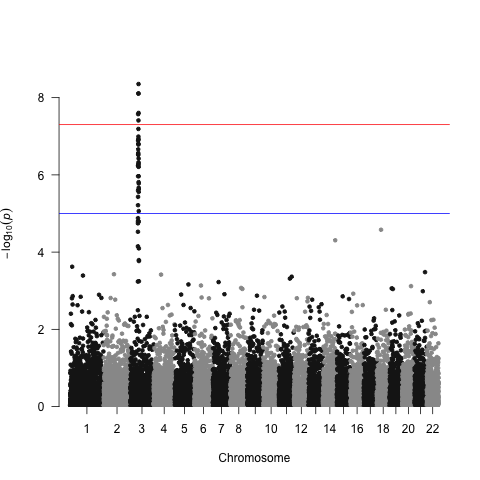

<rpy2.robjects.vectors.ListVector object at 0x7f924165c100> [RTYPES.VECSXP]
R classes: ('list',)
[BoolSexpVector]
  xpd: <class 'rpy2.rinterface.BoolSexpVector'>
  <rpy2.rinterface.BoolSexpVector object at 0x7f9245176ac0> [RTYPES.LGLSXP]

In [5]:
%R manhattan(gwasResults)

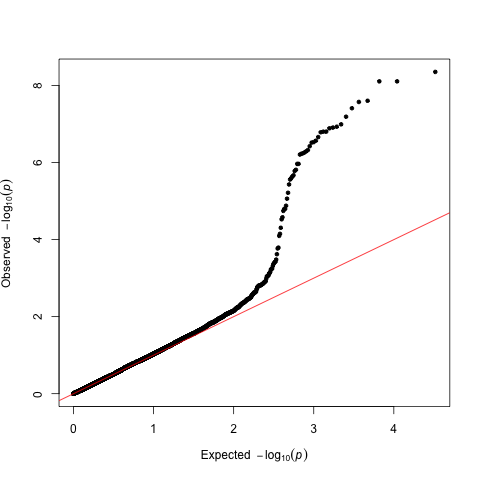

In [6]:
%R qq(gwasResults$P)

Specify Input & Output files

In [7]:
## input files
dir_gwas = '../data/gwas_plink'

plink_assoc = 'T2D_ebi-a-GCST007517.assoc'
plink_logistic = 'T2D_ebi-a-GCST007517.assoc.logistic'

## output dir
dir_plot = '../data/gwas_plink/plots_r_qqman'

In [8]:
gwas_file_assoc = os.path.join(dir_gwas, plink_assoc)
plot_prefix_assoc = os.path.join(dir_plot, plink_assoc)

gwas_file_logistic = os.path.join(dir_gwas, plink_logistic)
plot_prefix_logistic = os.path.join(dir_plot, plink_logistic)


## create output directory (if needed)
!mkdir -p {dir_plot}

#### read in file --> pandas DF

In [9]:
df = pd.read_csv(gwas_file_assoc, header=0, delim_whitespace=True)

df.head()

CHR          SNP      BP A1  F_A  F_U A2  CHISQ         P      OR
0    1   rs75333668  762320  T  0.0  0.0  C    0.0  0.972100 -0.0495
1    1  rs200686669  861349  T  0.0  0.0  C    0.0  0.765799 -0.0299
2    1  rs201186828  865545  A  0.0  0.0  G    0.0  0.702999  0.1469
3    1   rs41285790  865628  A  0.0  0.0  G    0.0  0.817000  0.0099
4    1  rs140751899  865662  A  0.0  0.0  G    0.0  0.583500 -0.0434

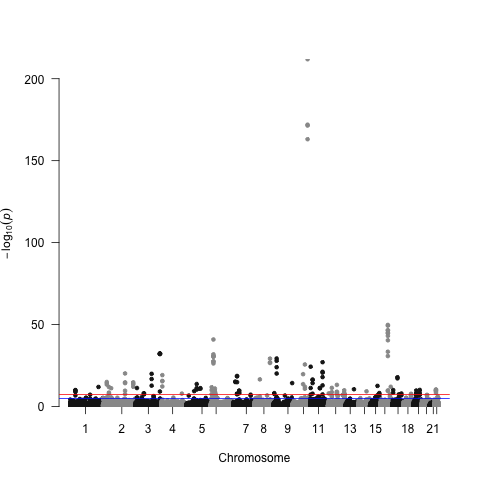

In [10]:
%%R -i df

manhattan(df)

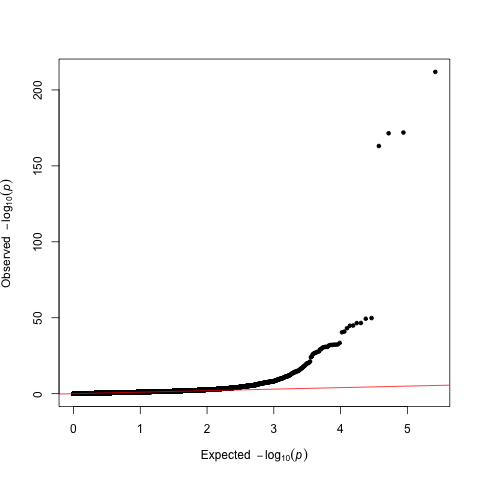

In [11]:
%%R -i df

qq(df$P)

In [12]:
df.dtypes

CHR        int64
SNP       object
BP         int64
A1        object
F_A      float64
F_U      float64
A2        object
CHISQ    float64
P        float64
OR       float64
dtype: object

In [13]:
df['CHR'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])